In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+") # names=column_names
print(data.head())
print(data.columns)
print(data.shape)

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
(506, 14)


In [3]:
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler

In [13]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]
# print("X: ", X, "y: ", y)

# Training Data
X_train = X.iloc[0:400, :]
y_train = y.iloc[0:400]

# Test Data
X_test = X.iloc[400: 506, :]
y_test = y.iloc[400: 506]

# Preprocessing the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

print("=============== PREDICTIONS ====================")
print(predictions)
print("================================================")

print("MAE = {0}", format(metrics.mean_absolute_error(y_test, predictions)))
print("MSE = {0}", format(metrics.mean_squared_error(y_test, predictions)))

=============== PREDICTIONS ====================
[13.68433344 19.97023388 21.97632384  9.67798959  5.32307249 -3.784651
  4.37461235 16.98836281 19.76839991 25.04622346  4.48434059 23.77767864
  8.81406987  8.68152787 -3.6588969  18.92987278 24.29219721  9.49678912
 -4.42096923 24.18627064 20.71201591 19.7693729  17.82577492 22.5070519
 19.57226847 16.36373896 20.67801036 11.22405813 22.22539565 21.84032121
 24.09304506 26.24161556 25.7032519  22.89905398 18.1480534  21.52171058
 19.40612831 16.90377242 16.75159743 16.19540232 12.81446226 20.67789866
 20.89237376 21.07570991 16.12742394 20.71908115 21.50954026 19.46660108
 19.59446597 21.82901509 24.23991457 23.96269171 22.06367648 27.5732331
 22.80558965 23.67878804 19.88192442 18.44512481 20.9441313  19.96720042
 24.53846659 23.01178384 21.60008544 22.77222421 22.11294624 21.55376606
 20.95484352 22.47524594 18.65023785 18.968263   23.57519908 24.60363773
 26.20168416 29.47059982 17.50304987 23.0400306  25.22612288 13.89302129
 21.33

In [27]:
theta=np.random.uniform(0,1,size=(X_train.shape[1]))
print("Type of theta:", type(theta), "Shape of Theta:", theta.shape)
niterations=1000
alpha=0.01
m=X_train.shape[0]
n=X_train.shape[1]
for i in range(niterations):
    update=np.zeros(X_train.shape[1])
    ypred=np.dot(X_train,theta)
    error=ypred - y_train
    for j in range(n):
        update[j]=np.sum(error*(X_train.T)[j])
    theta = theta - (1/m)*(alpha)*update
    cost = (1 / (2 * m)) * np.sum(np.square(error))

print("Theta:",theta)
print("Cost:", cost)
print("Update:", update)
print("Theta Shape:", theta.shape)
predictions=np.dot(X_test, theta)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Type of theta: <class 'numpy.ndarray'> Shape of Theta: (12,)
Theta: [-1.67128808  0.74967107 -0.32031384  0.63458204 -1.51185283  5.4815745
 -1.27733843 -2.6449459   2.2401671  -0.9696179  -1.7545075  -0.12283284]
Cost: 309.54781759810663
Update: [  9.88380376  -9.57911984 -12.97095223   3.488762    33.63505496
   7.60068058   5.79534413  30.87019028 -39.71525496  27.80209129
   7.32048982   6.62076466]
Theta Shape: (12,)
MAE: 19.741144591508412
MSE: 425.2819199441385


In [36]:
update = np.zeros(X_train.shape[1])
update

y_pred = np.dot(X_train, theta)
y_pred

X_train
theta = np.random.uniform(0, 1, size=(X_train.shape[1]))
theta

print(error.shape)

(400,)


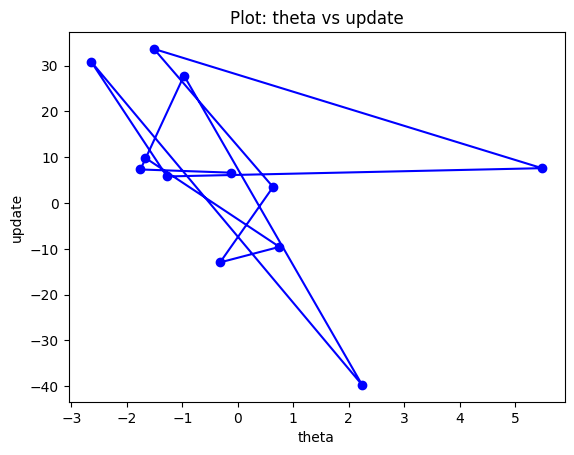

In [28]:
# Plot between update and theta

plt.figure()
plt.plot(theta, update, marker='o', linestyle='-', color='b')
plt.title('Plot: theta vs update')
plt.xlabel('theta')
plt.ylabel('update')

# plt.grid(True)

plt.show()